In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [2]:
!apt-get update
!apt-get install -y iverilog

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,932 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,267 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

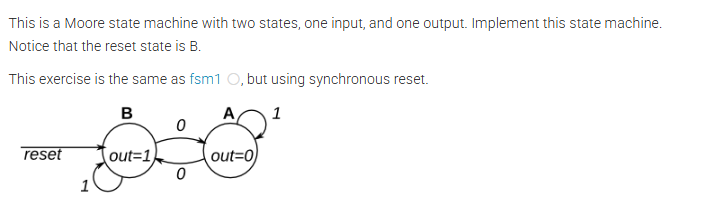

In [3]:
# fsm1s
%%writefile fsm.v
// Note the Verilog-1995 module declaration syntax here:
module top_module(clk, reset, in, out);
    input clk;
    input reset;    // Synchronous reset to state B
    input in;
    output out;//
    reg out;

    // Fill in state name declarations
	parameter A = 1'b0, B = 1'b1;

    reg present_state, next_state;

    always @(posedge clk) begin
        if (reset) begin
            // Fill in reset logic
            present_state <= B;
        end else begin
            present_state <= next_state;
        end end
        always@(present_state, in)
            begin
                next_state = B;
            case (present_state)
                // Fill in state transition logic
                B : begin if(~in) next_state = A; end
                A : begin if(~in) next_state = B; else next_state = A; end
            endcase
            end

        always@(*) begin
            case (present_state)
                // Fill in output logic
                B : out = 1;
                A : out = 0;
            endcase
        end


endmodule


Writing fsm.v


Installing. Please wait... done!


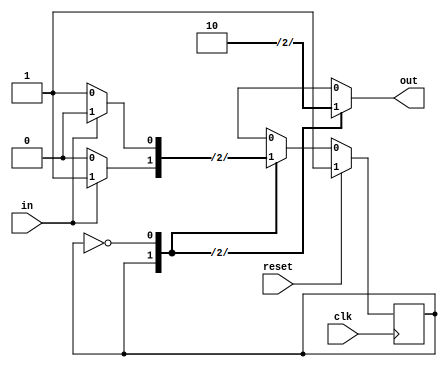

In [4]:
%%print_verilog
// Note the Verilog-1995 module declaration syntax here:
module top_module(clk, reset, in, out);
    input clk;
    input reset;    // Synchronous reset to state B
    input in;
    output out;//
    reg out;

    // Fill in state name declarations
	parameter A = 1'b0, B = 1'b1;

    reg present_state, next_state;

    always @(posedge clk) begin
        if (reset) begin
            // Fill in reset logic
            present_state <= B;
        end else begin
            present_state <= next_state;
        end end
        always@(present_state, in)
            begin
                next_state = B;
            case (present_state)
                // Fill in state transition logic
                B : begin if(~in) next_state = A; end
                A : begin if(~in) next_state = B; else next_state = A; end
            endcase
            end

        always@(*) begin
            case (present_state)
                // Fill in output logic
                B : out = 1;
                A : out = 0;
            endcase
        end


endmodule


In [21]:
%%writefile tb.v
`timescale 1ns/1ns

module tb;
  reg clk_tb, reset_tb, in_tb; wire out_tb;

  parameter CYCLE = 10;

  top_module top(.clk(clk_tb), .reset(reset_tb), .in(in_tb), .out(out_tb));

  always begin
    #(CYCLE/2);
      clk_tb = 1'b1;
    #(CYCLE/2);
      clk_tb = ~clk_tb;
  end

  task initialize;
  begin
  clk_tb = 1'b0;
    in_tb = 1'b0;
    reset_tb = 1'b0;
  end
  endtask

  task stimulus(input data);
  begin
  @(negedge clk_tb)
  in_tb = data;
  end
  endtask

  initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0, tb);
  initialize;
  #5 reset_tb = 1'b1;
  #10 reset_tb = 1'b0;
  stimulus(1);
  stimulus(0);
  stimulus(0);
  stimulus(1);
  stimulus(1);
  $finish;
  end

  initial begin
  $monitor("Time = %0t ns | clock=%b reset=%b in=%b out=%b", $time, clk_tb, reset_tb, in_tb, out_tb);
  end
endmodule

Overwriting tb.v


In [22]:
!iverilog -o tb.out fsm.v tb.v
!vvp tb.out

VCD info: dumpfile tb.vcd opened for output.
Time = 0 ns | clock=0 reset=0 in=0 out=x
Time = 5 ns | clock=1 reset=1 in=0 out=1
Time = 10 ns | clock=0 reset=1 in=0 out=1
Time = 15 ns | clock=1 reset=0 in=0 out=0
Time = 20 ns | clock=0 reset=0 in=1 out=0
Time = 25 ns | clock=1 reset=0 in=1 out=0
Time = 30 ns | clock=0 reset=0 in=0 out=0
Time = 35 ns | clock=1 reset=0 in=0 out=1
Time = 40 ns | clock=0 reset=0 in=0 out=1
Time = 45 ns | clock=1 reset=0 in=0 out=0
Time = 50 ns | clock=0 reset=0 in=1 out=0
Time = 55 ns | clock=1 reset=0 in=1 out=0
Time = 60 ns | clock=0 reset=0 in=1 out=0


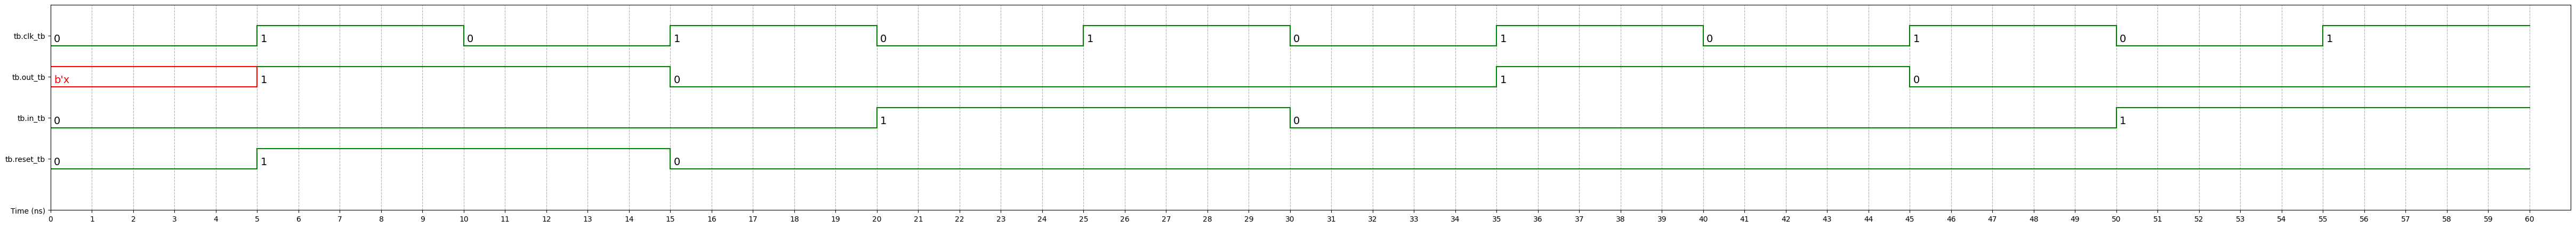

In [23]:
%%waveform tb.vcd
sign_list = ['tb.clk_tb','tb.out_tb', 'tb.in_tb', 'tb.reset_tb']
time_begin = 0
time_end = 60
base = 'bin'